In [1]:
# Mean-variance optimization


In [2]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
tickers = ["MSFT", "AMZN", "KO", "MA", "COST", 
           "LUV", "XOM", "PFE", "JPM", "UNH", 
           "ACN", "DIS", "GILD", "TSLA","NVDA","AAPL","AMD","F","SOS","RGS"] 

In [6]:
# Make a request to the Django API
params = {'tickers': tickers }
response = requests.get('http://127.0.0.1:8000/prices/', params=params)
data = response.json()


In [7]:
prices= pd.DataFrame(data)

In [8]:
#modify the data frame structure from yfinance data to jupyter_notebook
import pandas as pd

# Assuming df is your data frame
prices['Date'] = pd.to_datetime(prices['Date'])
prices.set_index('Date', inplace=True)
prices.sort_index(inplace=True)


In [9]:
prices.tail()

,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2023-06-01,180.089996,305.200012,119.470001,122.769997,512.599976,88.589996,12.11,76.209999,137.580002,60.000000,29.110001,370.880005,332.579987,397.700012,38.020000,1.04,3.99,207.520004,493.630005,103.360001
2023-06-02,180.949997,311.390015,117.860001,124.250000,512.590027,90.769997,12.39,77.889999,140.470001,61.160000,30.070000,373.730011,335.399994,393.269989,38.360001,1.10,3.96,213.970001,499.579987,105.760002
2023-06-05,179.580002,304.450012,117.930000,125.300003,518.250000,91.000000,12.59,77.720001,139.089996,60.750000,30.000000,370.519989,335.940002,391.709991,38.650002,1.09,4.03,217.610001,498.190002,105.290001
2023-06-06,179.210007,308.040009,124.230003,126.610001,516.260010,92.160004,12.93,76.199997,139.339996,60.310001,30.389999,379.959991,333.679993,386.540009,38.369999,1.12,4.04,221.309998,487.570007,106.150002
2023-06-07,177.820007,311.029999,117.830002,121.230003,511.230011,92.519997,13.59,76.080002,140.690002,60.220001,30.790001,371.390015,323.380005,374.750000,38.889999,1.08,4.13,224.570007,482.130005,108.529999


In [10]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15464 entries, 1962-01-02 to 2023-06-07
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    10711 non-null  float64
 1   ACN     5506 non-null   float64
 2   AMD     10899 non-null  float64
 3   AMZN    6559 non-null   float64
 4   COST    9304 non-null   float64
 5   DIS     15464 non-null  float64
 6   F       12865 non-null  float64
 7   GILD    7903 non-null   float64
 8   JPM     10899 non-null  float64
 9   KO      15464 non-null  float64
 10  LUV     10951 non-null  float64
 11  MA      4288 non-null   float64
 12  MSFT    9385 non-null   float64
 13  NVDA    6134 non-null   float64
 14  PFE     12865 non-null  float64
 15  RGS     8051 non-null   float64
 16  SOS     1538 non-null   float64
 17  TSLA    3258 non-null   float64
 18  UNH     9738 non-null   float64
 19  XOM     15464 non-null  float64
dtypes: float64(20)
memory usage: 2.5 MB


In [11]:
from pandas import DataFrame
from tabulate import  tabulate

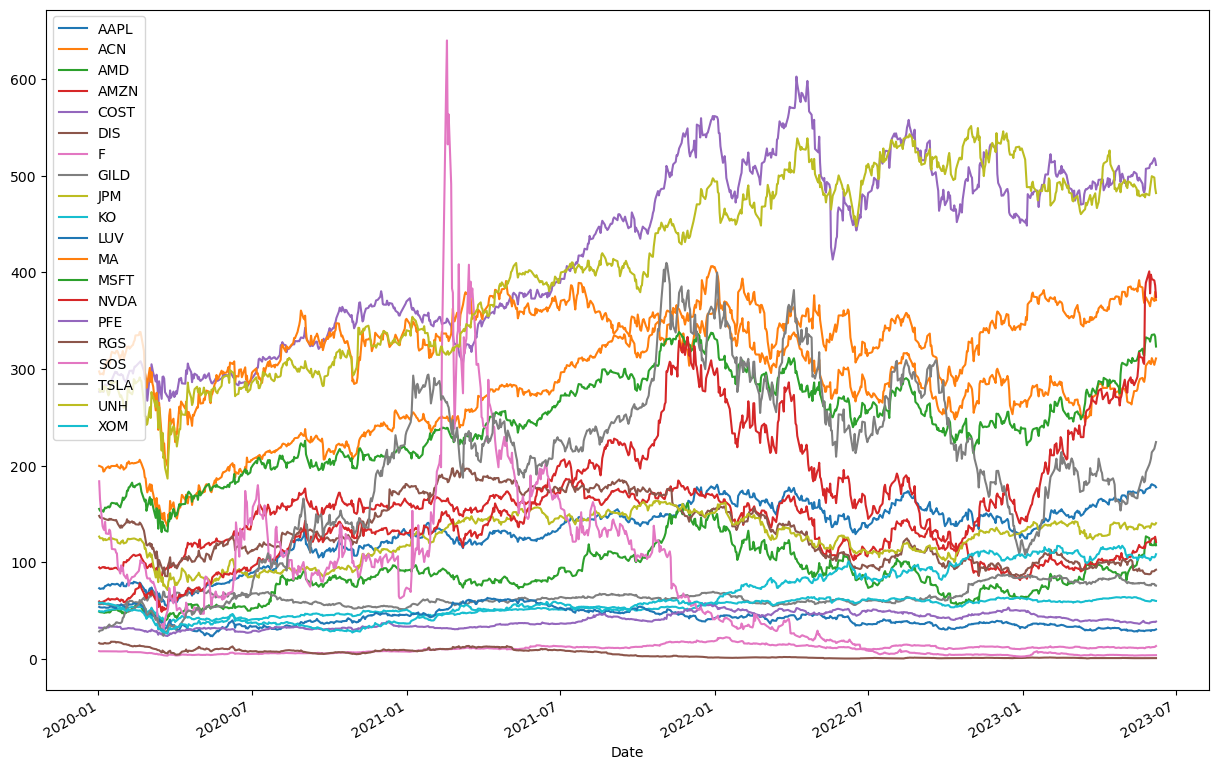

In [12]:
prices[prices.index >= "2020-01-01"].plot(figsize=(15,10));
plt.savefig("s4_1.png")


## Calculating the covariance matrix

In [13]:
import pypfopt
pypfopt.__version__

'1.5.4'

In [14]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
AAPL,0.200029,0.039140,0.090353,0.078833,0.038995,0.040594,0.044068,0.040966,0.046294,0.025176,0.036311,0.053505,0.063236,0.100318,0.026976,0.033417,0.065994,0.058141,0.033792,0.026193
ACN,0.039140,0.090729,0.060611,0.047149,0.028586,0.041595,0.044938,0.028670,0.048104,0.020563,0.037294,0.046344,0.042430,0.064940,0.025781,0.037506,0.055884,0.044712,0.030079,0.030111
AMD,0.090353,0.060611,0.354128,0.105266,0.043290,0.053848,0.068249,0.049611,0.062431,0.027538,0.055138,0.071950,0.073657,0.180499,0.033799,0.048912,0.119765,0.100060,0.037033,0.033139
AMZN,0.078833,0.047149,0.105266,0.326875,0.048096,0.056321,0.053844,0.056848,0.065427,0.020156,0.047848,0.056865,0.073241,0.105485,0.030846,0.038545,0.078299,0.066700,0.034093,0.026570
COST,0.038995,0.028586,0.043290,0.048096,0.100671,0.031957,0.031906,0.026796,0.038195,0.021304,0.031085,0.032343,0.037424,0.045651,0.025140,0.023222,0.021927,0.029596,0.027289,0.020250
DIS,0.040594,0.041595,0.053848,0.056321,0.031957,0.099821,0.041573,0.031917,0.047175,0.026047,0.039895,0.050801,0.043067,0.065552,0.029169,0.038301,0.065797,0.044349,0.031609,0.025733
F,0.044068,0.044938,0.068249,0.053844,0.031906,0.041573,0.128052,0.029904,0.054723,0.026210,0.047210,0.062224,0.041840,0.070728,0.026964,0.050719,0.096780,0.060364,0.028935,0.028252
GILD,0.040966,0.028670,0.049611,0.056848,0.026796,0.031917,0.029904,0.229403,0.041967,0.016717,0.030675,0.031869,0.034738,0.055190,0.032331,0.031427,-0.001206,0.031320,0.033571,0.020975
JPM,0.046294,0.048104,0.062431,0.065427,0.038195,0.047175,0.054723,0.041967,0.127213,0.027573,0.048921,0.068103,0.048813,0.074657,0.032470,0.051463,0.068756,0.041517,0.038185,0.033135
KO,0.025176,0.020563,0.027538,0.020156,0.021304,0.026047,0.026210,0.016717,0.027573,0.053246,0.022774,0.025931,0.027635,0.018361,0.025864,0.019386,0.009821,0.018418,0.022880,0.020544


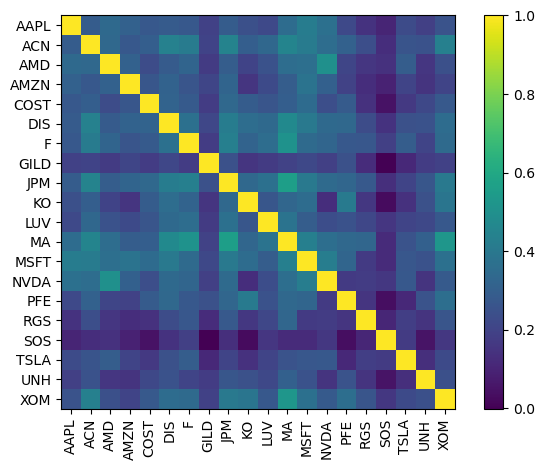

In [15]:
plotting.plot_covariance(sample_cov, plot_correlation=True);
plt.savefig("s4_2.png")

The sample covariance matrix should not be your default choice. I think a better option is Ledoit-Wolf shrinkage, which reduces the extreme values in the covariance matrix. In the image below, we can see that there are fewer bright spots outside the diagonal:

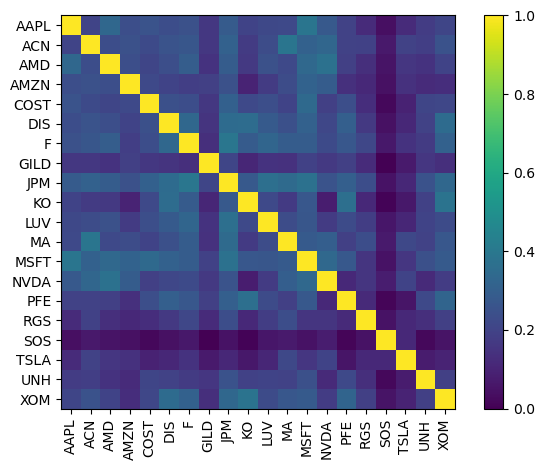

In [16]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);
plt.savefig("s4_3.png")

## Return estimation

It is often a bad idea to provide returns using a simple estimate like the mean of past returns. Unless you have a proprietary method for estimating returns, research suggests that you may be better off not providing expected returns – you can then just find the `min_volatility()` portfolio or use `HRP`. 

However, in this example we will use the CAPM returns, which aims to be slightly more stable than the default mean historical return. Please see the notebook `1-RiskReturnModels.ipynb` for more information.

In [17]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

AAPL    0.259731
ACN     0.196812
AMD     0.348676
AMZN    0.324579
COST    0.172903
DIS     0.202703
F       0.209194
GILD    0.214135
JPM     0.226544
KO      0.130011
LUV     0.203843
MA      0.241892
MSFT    0.227022
NVDA    0.380393
PFE     0.154858
RGS     0.224469
SOS     0.703873
TSLA    0.285543
UNH     0.186275
XOM     0.128416
Name: mkt, dtype: float64

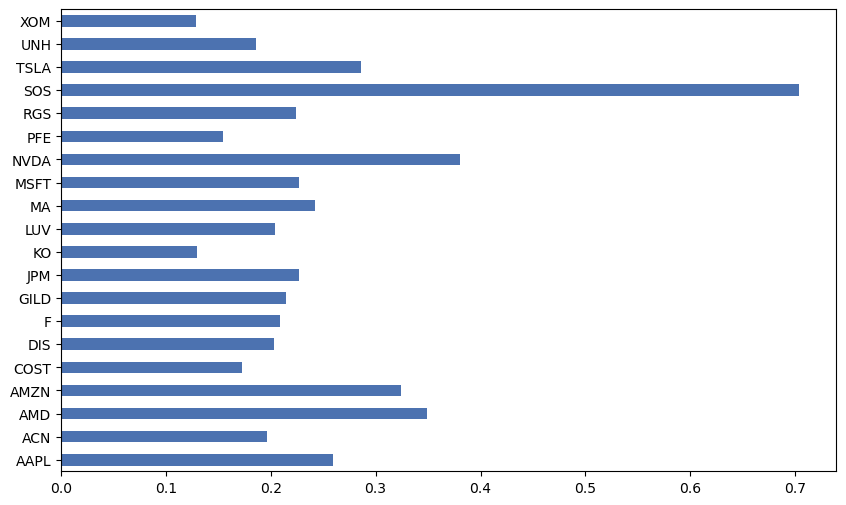

In [18]:
mu.plot.barh(figsize=(10,6));
plt.savefig("s4_4.png")

## Long/short min variance

In this section, we construct a long/short portfolio with the objective of minimising variance. There is a good deal of research that demonstrates that these global-minimum variance (GMV) portfolios outperform mean-variance optimized portfolios.

In [19]:
from pypfopt import EfficientFrontier

In [20]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.00288),
             ('ACN', 0.21851),
             ('AMD', -0.02401),
             ('AMZN', 0.00986),
             ('COST', 0.0977),
             ('DIS', -0.01799),
             ('F', -0.01996),
             ('GILD', 0.04952),
             ('JPM', -0.04252),
             ('KO', 0.12896),
             ('LUV', 0.02338),
             ('MA', 0.2196),
             ('MSFT', 0.00849),
             ('NVDA', -0.01415),
             ('PFE', 0.0703),
             ('RGS', 0.01728),
             ('SOS', 0.04848),
             ('TSLA', 0.11238),
             ('UNH', 0.0336),
             ('XOM', 0.07769)])

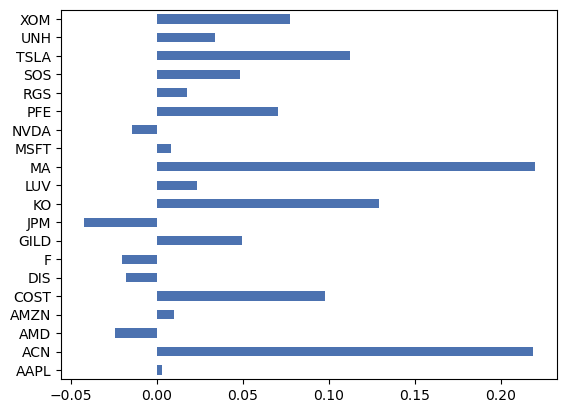

In [21]:
pd.Series(weights).plot.barh();
plt.savefig("s4_5.png")

We can get a quick indication of the portfolio performance as follows. Note that this is an in sample estimate and may have very little resemblance to how the portfolio actually performs!

In [22]:
ef.portfolio_performance(verbose=True);

Annual volatility: 12.0%


Let's say we were happy with this portfolio and wanted to actually go out and buy the shares.  To do this, we would need to construct a **discrete allocation** (unless your broker supports fractional shares!)

If we had $20,000 to invest and would like our portfolio to be 130/30 long/short, we can construct the actual allocation as follows:

In [23]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

/Users/surekaalmeida/opt/anaconda3/envs/env_zipline/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Discrete allocation performed with $273.91 leftover


/Users/surekaalmeida/opt/anaconda3/envs/env_zipline/lib/python3.8/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'ACN': 13,
 'AMZN': 1,
 'COST': 3,
 'GILD': 12,
 'KO': 38,
 'LUV': 14,
 'MA': 11,
 'PFE': 32,
 'RGS': 288,
 'SOS': 211,
 'TSLA': 9,
 'UNH': 1,
 'XOM': 13,
 'AMD': -10,
 'DIS': -10,
 'F': -74,
 'JPM': -15,
 'NVDA': -2}

## Max Sharpe with sector constraints

If you have your own model for returns (or have read the warnings and want to proceed anyways), you may consider maximising the Sharpe ratio. This theoretically gives the optimal portfolio in terms of risks-returns.

In this section, we construct a long-only max-sharpe portfolio, but also incorporate sector constraints. Sector constraints require three things. A `sector_mapper`, your `sector_lower` bounds, and your `sector_upper` bounds.

In [24]:
sector_mapper = {
    "MSFT": "Tech",
    "AMZN": "Consumer Discretionary",
    "KO": "Consumer Staples",
    "MA": "Financial Services",
    "COST": "Consumer Staples",
    "LUV": "Aerospace",
    "XOM": "Energy",
    "PFE": "Healthcare",
    "JPM": "Financial Services",
    "UNH": "Healthcare",
    "ACN": "Misc",
    "DIS": "Media",
    "GILD": "Healthcare",
    "F": "Auto",
    "TSLA": "Auto",
    "NVDA": "Tech",
    "AAPL":"Tech",
    "AMD" :"Tech",
    "F" : "Consumer Durables",
    "SOS": "Technology services",
    "RGS" :"Consumer services"
}

sector_lower = {
    "Consumer Staples": 0.1, # at least 10% to staples
    "Tech": 0.05 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Tech": 0.2,
    "Aerospace":0.1,
    "Energy": 0.1,
    "Auto":0.15
}

We then set up the optimizer and add our constraints. We can use `ef.add_objective()` to add other constraints. For example, let's say that in addition to the above sector constraints, I specifically want:

- 10% of the portfolio in AMZN
- Less than 5% of my portfolio in TSLA

In [25]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

amzn_index = ef.tickers.index("AMZN")
ef.add_constraint(lambda w: w[amzn_index] == 0.10)

tsla_index = ef.tickers.index("TSLA")
ef.add_constraint(lambda w: w[tsla_index] <= 0.05)

ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()

In [26]:
weights

OrderedDict([('AAPL', 0.00397),
             ('ACN', 0.08032),
             ('AMD', 0.0),
             ('AMZN', 0.1),
             ('COST', 0.04676),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.04115),
             ('JPM', 0.0),
             ('KO', 0.05324),
             ('LUV', 0.05),
             ('MA', 0.26048),
             ('MSFT', 0.0),
             ('NVDA', 0.05243),
             ('PFE', 0.00774),
             ('RGS', 0.01012),
             ('SOS', 0.22854),
             ('TSLA', 0.05),
             ('UNH', 0.01525),
             ('XOM', 0.0)])

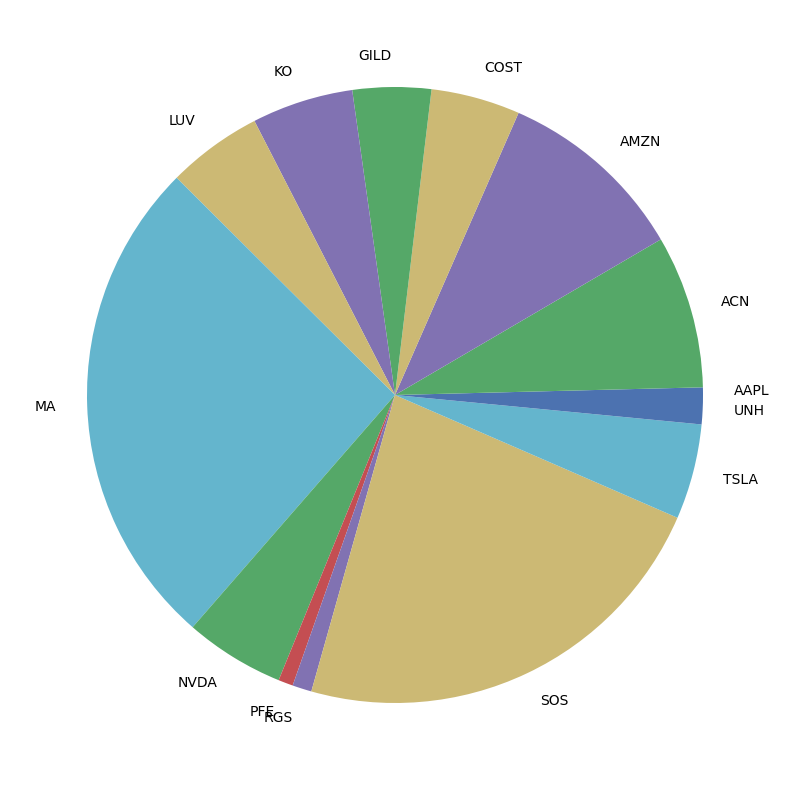

In [27]:
pd.Series(weights).plot.pie(figsize=(10,10));
plt.savefig("s4_6.png")

We can immediately see that our explicit constraints were satisfied, and can check all the sector constraints as follows:


In [28]:
# O(N^2) loop not a good idea in a coding interview :)
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Auto: 0.050
Consumer Staples: 0.100
Consumer services: 0.010
Tech: 0.056
Healthcare: 0.064
Media: 0.000
Aerospace: 0.050
Misc: 0.080
Financial Services: 0.260
Technology services: 0.229
Consumer Discretionary: 0.100
Energy: 0.000
Consumer Durables: 0.000


## Maximise return for a given risk, with L2 regularisation

Let's imagine that we've put a lot of thought into our risk tolerance, and have decided that we can't accept anything more than 15% volatility. We can use PyPortfolioOpt to construct a portfolio that maximises return for a given risk (with the same caveats about expected returns).

In [29]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.15)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.01044),
             ('ACN', 0.09291),
             ('AMD', 0.0),
             ('AMZN', 0.04987),
             ('COST', 0.05),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.04607),
             ('JPM', 0.0),
             ('KO', 0.05),
             ('LUV', 0.0),
             ('MA', 0.25062),
             ('MSFT', 0.0),
             ('NVDA', 0.04806),
             ('PFE', 0.02425),
             ('RGS', 0.01172),
             ('SOS', 0.20781),
             ('TSLA', 0.13731),
             ('UNH', 0.02093),
             ('XOM', 0.0)])

In [30]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

7/20 tickers have zero weight


In [31]:
ef.portfolio_performance(verbose=True);

Expected annual return: 33.7%
Annual volatility: 15.0%
Sharpe Ratio: 2.11


While this portfolio seems like it meets our objectives, we might be worried by the fact that a lot of the tickers have been assigned zero weight. In effect, the optimizer is "overfitting" to the data you have provided -- you are much more likely to get better results by enforcing some level of diversification. One way of doing this is to use **L2 regularisation** – essentially, adding a penalty on the number of near-zero weights.

In [32]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamma is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.01502),
             ('ACN', 0.09386),
             ('AMD', 0.00252),
             ('AMZN', 0.05379),
             ('COST', 0.04986),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.04806),
             ('JPM', 0.0),
             ('KO', 0.05014),
             ('LUV', 0.00932),
             ('MA', 0.1895),
             ('MSFT', 0.01204),
             ('NVDA', 0.05439),
             ('PFE', 0.0326),
             ('RGS', 0.021),
             ('SOS', 0.2066),
             ('TSLA', 0.13335),
             ('UNH', 0.02795),
             ('XOM', 0.0)])

In [33]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

4/20 tickers have zero weight


We can tune the value of gamma to choose the number of nonzero tickers. Larger gamma pulls portfolio weights towards an equal allocation.

In [34]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamma is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.03219),
             ('ACN', 0.06009),
             ('AMD', 0.02468),
             ('AMZN', 0.05839),
             ('COST', 0.05241),
             ('DIS', 0.02443),
             ('F', 0.01996),
             ('GILD', 0.04773),
             ('JPM', 0.02613),
             ('KO', 0.04759),
             ('LUV', 0.03059),
             ('MA', 0.08078),
             ('MSFT', 0.03614),
             ('NVDA', 0.06317),
             ('PFE', 0.036),
             ('RGS', 0.03947),
             ('SOS', 0.17056),
             ('TSLA', 0.08873),
             ('UNH', 0.03852),
             ('XOM', 0.02243)])

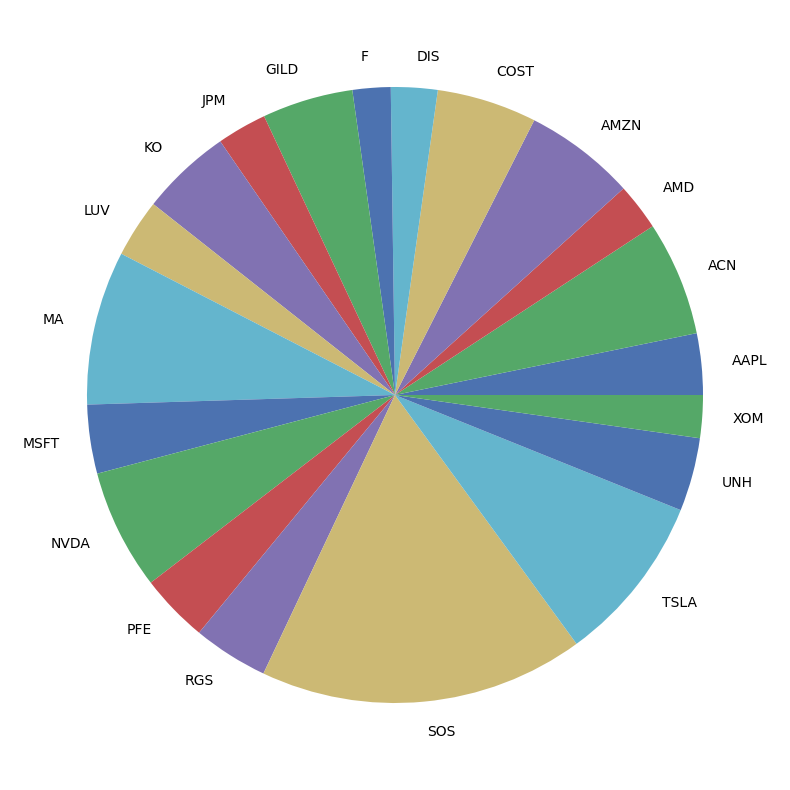

In [35]:
pd.Series(weights).plot.pie(figsize=(10, 10));
plt.savefig("s4_7.png")

In [36]:
ef.portfolio_performance(verbose=True);

Expected annual return: 31.6%
Annual volatility: 15.0%
Sharpe Ratio: 1.97


The resulting portfolio still has a volatility of less than our 15% limit. It's in-sample Sharpe ratio has gone down, but this portfolio is a lot more robust for actual investment.

## Minimise risk for a given return, market-neutral

We may instead be in the situation where we have a certain required rate of return (maybe we are a pension fund that needs 7% return a year), but would like to minimise risk. Additionally, suppose we would like our portfolio to be market neutral, in the sense that it is equally exposed to the long and short sides.  

In [37]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.00265),
             ('ACN', -0.01415),
             ('AMD', 0.02256),
             ('AMZN', 0.01823),
             ('COST', -0.01913),
             ('DIS', -0.0104),
             ('F', -0.00937),
             ('GILD', -0.00798),
             ('JPM', -0.00452),
             ('KO', -0.02956),
             ('LUV', -0.01081),
             ('MA', -0.00183),
             ('MSFT', -0.00549),
             ('NVDA', 0.03112),
             ('PFE', -0.02285),
             ('RGS', -0.00562),
             ('SOS', 0.10437),
             ('TSLA', 0.00813),
             ('UNH', -0.0146),
             ('XOM', -0.03076)])

In [38]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 5.5%
Sharpe Ratio: 0.91


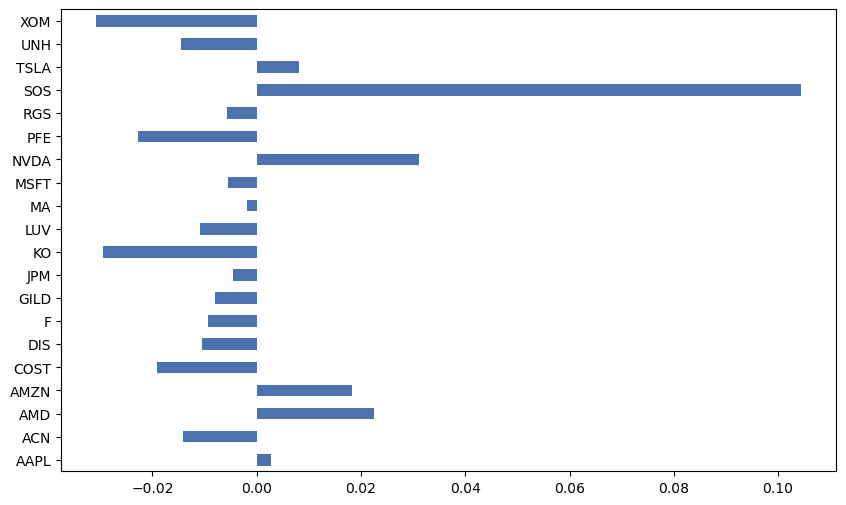

In [39]:
pd.Series(weights).plot.barh(figsize=(10,6));
plt.savefig("s4_8.png")

In [40]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: -0.00


## Efficient semi-variance optimization

In this example, we will minimise the portfolio semivariance (i.e downside volatility) subject to a return constraint (target 20%).

There are actually two ways of doing this in PyPortfolioOpt. The first is the "intuitive" way. We compute a semicovariance matrix, and pass this into `EfficientFrontier` (just like we would do for the exponential cov matrix or the Ledoit-Wolf shrunk matrix).

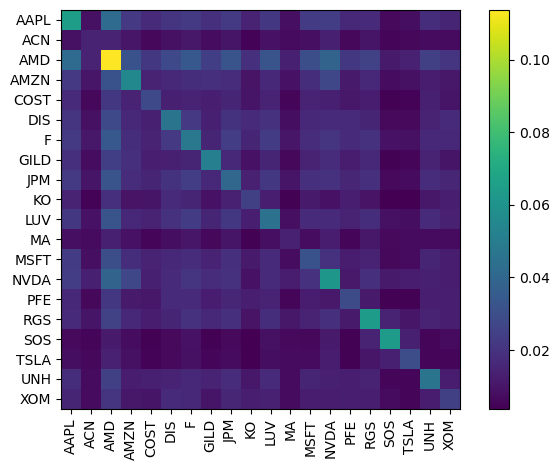

In [41]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);
plt.savefig("s4_9.png")

In [42]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.2)
weights = ef.clean_weights()
weights


OrderedDict([('AAPL', 0.0),
             ('ACN', 0.24731),
             ('AMD', 0.0),
             ('AMZN', 0.0),
             ('COST', 0.08459),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.01691),
             ('JPM', 0.0),
             ('KO', 0.14584),
             ('LUV', 0.0),
             ('MA', 0.30898),
             ('MSFT', 0.0),
             ('NVDA', 0.0),
             ('PFE', 0.04971),
             ('RGS', 0.0),
             ('SOS', 0.03835),
             ('TSLA', 0.09685),
             ('UNH', 0.00229),
             ('XOM', 0.00918)])

In [43]:
ef.portfolio_performance(verbose=True);

Expected annual return: 22.5%
Annual volatility: 9.2%
Sharpe Ratio: 2.22


However, this solution is not truly optimal in mean-semivariance space. To do the optimization properly, we must use the `EfficientSemivariance` class. This requires us to first compute the returns and drop NaNs.

In [44]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [45]:
from pypfopt import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.2)
es.portfolio_performance(verbose=True);


Expected annual return: 20.0%
Annual semi-deviation: 12.2%
Sortino Ratio: 1.47


To compare this with the heuristic solution, I will use a quick hack: replacing the `es.weights` with `es.weights` and running `es.portfolio_performance` again. Please don't be encouraged to do this in real life!

In [46]:
es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 22.5%
Annual semi-deviation: 16.3%
Sortino Ratio: 1.25


We see that the heuristic method has a significantly lower Sortino ratio, and much higher semivariance.

## Efficient CVaR optimization

In this example, we will find the portfolio that maximises return subject to a CVaR constraint.

Before doing this, let's first compute the 95%-CVaR for the max-sharpe portfolio.

In [47]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

,AAPL,ACN,AMD,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,NVDA,PFE,RGS,SOS,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2017-05-01,0.020397,-0.000412,0.024060,0.025125,0.001915,-0.007526,-0.004359,-0.006418,0.000689,0.001623,0.001067,0.000430,0.013876,0.022435,-0.004127,0.001833,0.195312,0.027892,-0.001658,0.005021
2017-05-02,0.006345,-0.004701,-0.242291,-0.001360,0.004104,-0.003138,-0.043783,0.007047,-0.006432,0.003933,0.036425,0.015038,-0.001585,-0.029632,-0.005033,-0.005490,0.028758,-0.012205,-0.002578,-0.000122
2017-05-03,-0.003051,-0.003149,0.006783,-0.006241,0.006888,-0.024045,0.013736,-0.020120,0.005780,-0.001613,-0.002915,-0.006688,-0.003175,0.007441,-0.004165,-0.001840,0.000000,-0.024679,-0.009188,0.007922
2017-05-04,-0.003604,0.004323,-0.027911,-0.003719,0.014625,-0.004032,-0.006323,0.012945,0.001150,0.007849,0.003095,0.005029,-0.003909,-0.003837,-0.000598,-0.139171,-0.007624,-0.050029,0.008578,-0.012818
2017-05-05,0.016584,0.005794,0.008911,-0.003605,-0.012332,0.007376,0.012728,-0.004113,-0.001148,0.000687,0.001028,-0.003562,0.002761,0.000096,0.000897,-0.022484,-0.030730,0.043627,0.000574,0.004655


In [48]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 34.3%
Annual volatility: 15.3%
Sharpe Ratio: 2.11


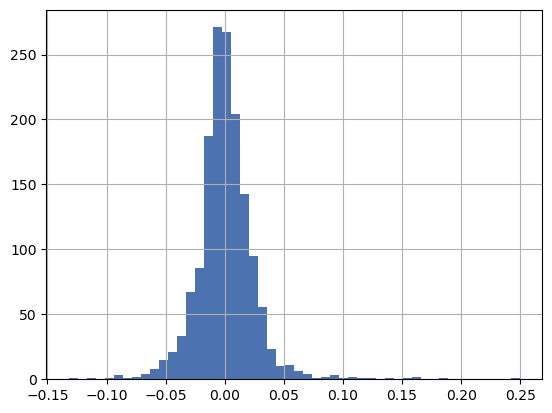

In [49]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);
plt.savefig("s4_10.png")

In [50]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -3.44%
CVaR: -5.24%


This value of the CVaR means that our average loss on the worst 5% of days will be -3.35%. Let's say that this were beyond our comfort zone (for a \\$100,000 portfolio, this would mean losing \\$3350 in a day).

Let's firstly construct the portfolio with the minimum CVaR:

In [51]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 16.2%
Conditional Value at Risk: 2.49%


We have significantly reduced the CVaR, but at the cost of a large reduction in returns. We can use `efficient_risk` to maximise the return for a target risk. Let's say that a 2.5% CVaR is acceptable.

In [52]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.025)
ec.portfolio_performance(verbose=True);

Expected annual return: 17.3%
Conditional Value at Risk: 2.50%


We now have similar returns to before (24.7% vs 25.8%), but with a lower tail risk (2.50% CVaR vs 3.35%). 

## Plotting - Unconstrained

To plot the unconstrained efficient frontier, it is easiest to use the critical line algorithm. 

In [53]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 33.3%
Annual volatility: 14.8%
Sharpe Ratio: 2.11


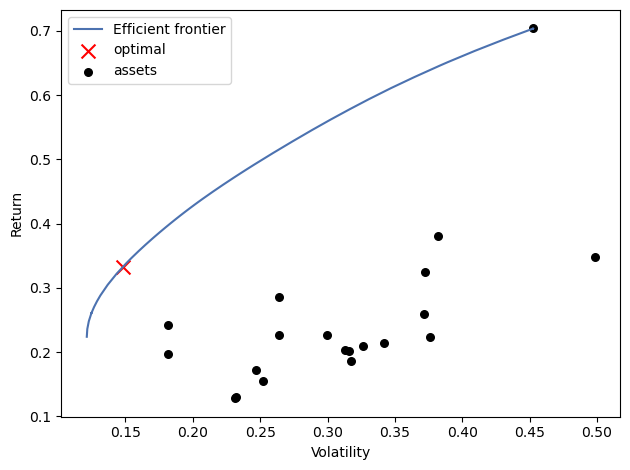

In [54]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)
plt.savefig("s4_11.png")

## Plotting - Constrained

In this example, we will plot the efficient frontier corresponding to portfolios with a constraint on exposure to MSFT, AMZN, and TSLA (e.g maybe we want to avoid big tech).

In [55]:
import cvxpy as cp

mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S,)
big_tech_indices = [t in {"MSFT", "AMZN", "TSLA"} for t in tickers]
ef.add_constraint(lambda w: cp.sum(w[big_tech_indices]) <= 0.3)

As per the docs, *before* we call any optimization function, we should pass this to the plotting module:

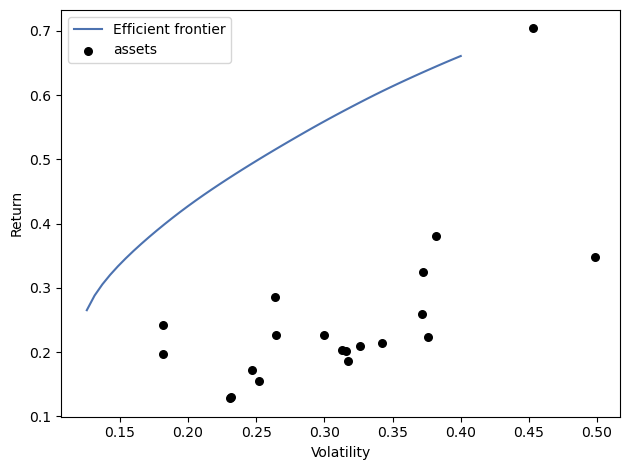

In [56]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk", 
                                      ef_param_range=np.linspace(0.12, 0.4, 50), 
                                      showfig=False);
plt.savefig("s4_12.png")

## Complex plots

The `plotting` module allows you to pass in an `ax`, on top of which the plots are added. This allows you to build complex plots. 

In this example, we will plot the efficient frontier as well as 10,000 simulated portfolios. 

To generate the simulated portfolios, we will sample random weights from the Dirichlet distribution (these are already normalised):

In [57]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.2572844  0.20908504 0.21389868 ... 0.25545414 0.23789636 0.24927143]
Sample portfolio volatilities: 0       0.187456
1       0.155929
2       0.158921
3       0.157873
4       0.145784
          ...   
9995    0.183917
9996    0.156887
9997    0.155048
9998    0.157602
9999    0.166348
Length: 10000, dtype: float64


Note that the above code is equivalent to generating samples via a for loop (just more efficient)

In [58]:
# mus = []
# stds = []
# sharpes = []
# for _ in range(10000):
#     w = np.random.dirichlet(np.ones(len(mu)))
#     # w = np.random.rand(len(mu))
#     # w /= w.sum()
#     ret = mu.dot(w)
#     std = np.sqrt(w.dot(S @ w))
#     mus.append(ret)
#     stds.append(std)
#     sharpes.append(ret / std)

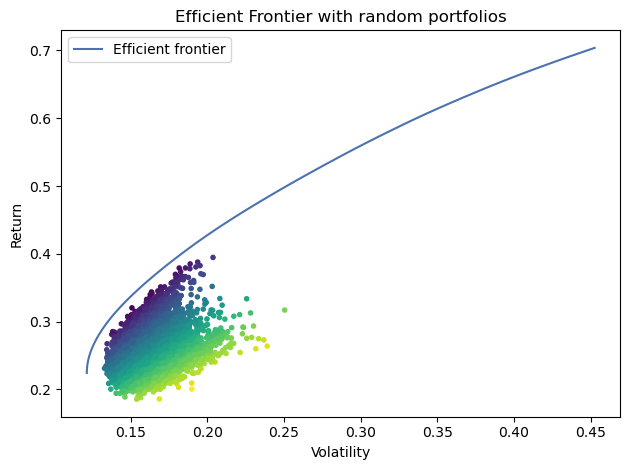

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()
plt.savefig("s4_13.png")